In [1]:
import pandas as pd

data = pd.read_csv('insurance.csv')

data.head(10)

mean_age = data['age'].mean()
data.fillna(mean_age)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:

data.sort_values(by=['bmi'],inplace=True)

grouping = data.groupby(['sex'])

grouping_by_male = grouping.get_group('male').sort_values(by='age')
grouping_by_female = grouping.get_group('female').sort_values(by='age')

counts_by_smoke_male = grouping_by_male['smoker'].value_counts(normalize=True)
counts_by_smoke_female = grouping_by_female['smoker'].value_counts(normalize=True)

counts_by_region_female = grouping_by_female['region'].value_counts()
counts_by_region_male = grouping_by_male['region'].value_counts() 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
grouping_by_male

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.79640
1080,18,male,21.780,2,no,southeast,11884.04858
295,18,male,22.990,0,no,northeast,1704.56810
1041,18,male,23.085,0,no,northeast,1704.70015
940,18,male,23.210,0,no,southeast,1121.87390
...,...,...,...,...,...,...,...
752,64,male,37.905,0,no,northwest,14210.53595
1241,64,male,36.960,2,yes,southeast,49577.66240
398,64,male,25.600,2,no,southwest,14988.43200
418,64,male,39.160,1,no,southeast,14418.28040


In [6]:
grouping_by_female

,age,sex,bmi,children,smoker,region,charges
492,18,female,25.080,0,no,northeast,2196.47320
399,18,female,38.170,0,no,southeast,1631.66830
469,18,female,24.090,1,no,southeast,2201.09710
571,18,female,37.290,1,no,southeast,2219.44510
482,18,female,31.350,0,no,southeast,1622.18850
...,...,...,...,...,...,...,...
890,64,female,26.885,0,yes,northwest,29330.98315
603,64,female,39.050,3,no,southeast,16085.12750
801,64,female,35.970,0,no,southeast,14313.84630
402,64,female,32.965,0,no,northwest,14692.66935


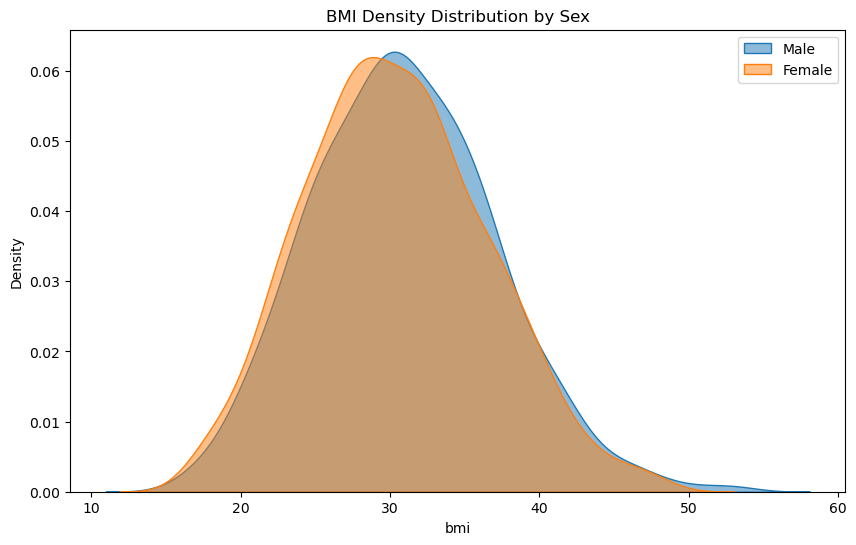

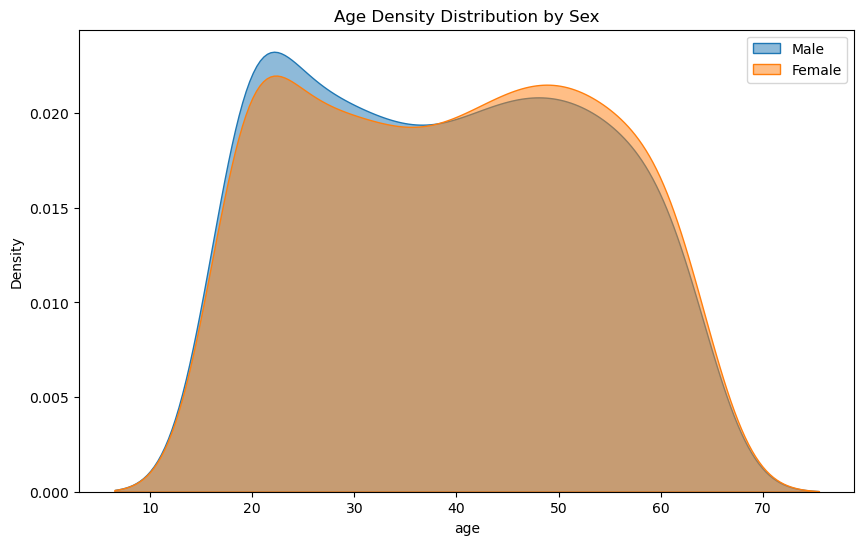

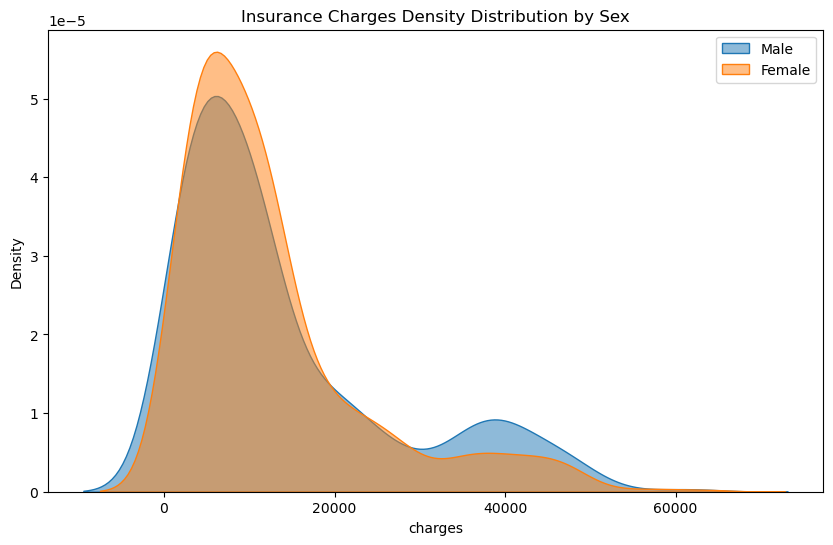

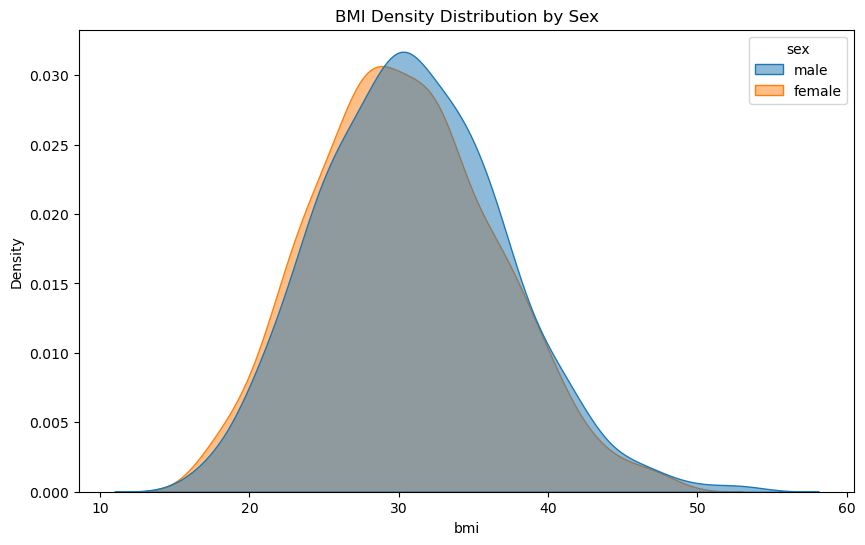

In [7]:
# 1. BMI KDE plot by sex
plt.figure(figsize=(10, 6))
sns.kdeplot(data=grouping_by_male, x='bmi', label='Male', fill=True, alpha=0.5)
sns.kdeplot(data=grouping_by_female, x='bmi', label='Female', fill=True, alpha=0.5)
plt.legend()
plt.title('BMI Density Distribution by Sex')
plt.show()

# 2. Age KDE plot by sex
plt.figure(figsize=(10, 6))
sns.kdeplot(data=grouping_by_male, x='age', label='Male', fill=True, alpha=0.5)
sns.kdeplot(data=grouping_by_female, x='age', label='Female', fill=True, alpha=0.5)
plt.legend()
plt.title('Age Density Distribution by Sex')
plt.show()

# 3. Charges KDE plot by sex
plt.figure(figsize=(10, 6))
sns.kdeplot(data=grouping_by_male, x='charges', label='Male', fill=True, alpha=0.5)
sns.kdeplot(data=grouping_by_female, x='charges', label='Female', fill=True, alpha=0.5)
plt.legend()
plt.title('Insurance Charges Density Distribution by Sex')
plt.show()

# 4. KDE plot with hue (smoker status)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=data, x='bmi', hue='sex', fill=True, alpha=0.5)
plt.title('BMI Density Distribution by Sex')
plt.show()



In [8]:
data

,age,sex,bmi,children,smoker,region,charges
172,18,male,15.960,0,no,northeast,1694.79640
428,21,female,16.815,1,no,northeast,3167.45585
1226,38,male,16.815,2,no,northeast,6640.54485
412,26,female,17.195,2,yes,northeast,14455.64405
1286,28,female,17.290,0,no,northeast,3732.62510
...,...,...,...,...,...,...,...
286,46,female,48.070,2,no,northeast,9432.92530
116,58,male,49.060,0,no,southeast,11381.32540
847,23,male,50.380,1,no,southeast,2438.05520
1047,22,male,52.580,1,yes,southeast,44501.39820


In [9]:
#Categorize BMI
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25.0:
        return 'Normal weight'
    elif bmi < 30.0:
        return 'Overweight'
    else:
        return 'Obese'

data['category'] = data['bmi'].apply(categorize_bmi)


In [10]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges,category
172,18,male,15.960,0,no,northeast,1694.79640,Underweight
428,21,female,16.815,1,no,northeast,3167.45585,Underweight
1226,38,male,16.815,2,no,northeast,6640.54485,Underweight
412,26,female,17.195,2,yes,northeast,14455.64405,Underweight
1286,28,female,17.290,0,no,northeast,3732.62510,Underweight
1029,37,female,17.290,2,no,northeast,6877.98010,Underweight
250,18,male,17.290,2,yes,northeast,12829.45510,Underweight
28,23,male,17.385,1,no,northwest,2775.19215,Underweight
680,21,female,17.400,1,no,southwest,2585.26900,Underweight
410,19,male,17.480,0,no,northwest,1621.34020,Underweight


In [11]:
groupping_2 = data.groupby(['sex'])

groupping_male = groupping_2.get_group('male')
groupping_female = groupping_2.get_group('female')

counts_male = groupping_male['category'].value_counts()
counts_female = groupping_female['category'].value_counts()


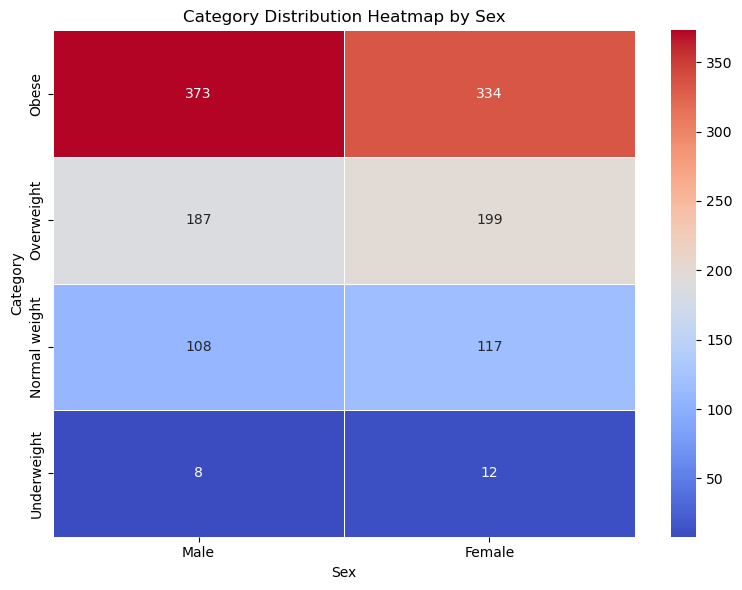

In [12]:
# Create a DataFrame for the heatmap
category_data = pd.DataFrame({
    'Male': counts_male,
    'Female': counts_female
})

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(category_data, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Category Distribution Heatmap by Sex')
plt.xlabel('Sex')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

